## Homework 1 (Data mining)

#### Name: Jefferson Javier Hernández Panqueba (1019096996)



In [153]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy import stats
import itertools

This homework was based on the ecoly dataset found [here](http://archive.ics.uci.edu/ml/datasets/Ecoli).

Main features of the dataset

1. Number of instances: 336
2. Missing attributes values: None

The dataset has the following features:

1.  Sequence Name: Accession number for the SWISS-PROT database
2.  mcg: McGeoch's method for signal sequence recognition.
3.  gvh: von Heijne's method for signal sequence recognition.
4.  lip: von Heijne's Signal Peptidase II consensus sequence score.
       Binary attribute.
5.  chg: Presence of charge on N-terminus of predicted lipoproteins.
   Binary attribute.
6.  aac: score of discriminant analysis of the amino acid content of
   outer membrane and periplasmic proteins.
7. alm1: score of the ALOM membrane spanning region prediction program.
8. alm2: score of ALOM program after excluding putative cleavable signal
   regions from the sequence.
   
For this homework I didn't use the Sequence name because it's unique on each dataset row.

Class prediction description: 

* cp  (cytoplasm),                                    143 elements
* im  (inner membrane without signal sequence),        77 elements              
* pp  (perisplasm),                                    52 elements
* imU (inner membrane, uncleavable signal sequence),   35 elements
* om  (outer membrane),                                20 elements
* omL (outer membrane lipoprotein),                     5 elements
* imL (inner membrane lipoprotein),                     2 elements
* imS (inner membrane, cleavable signal sequence),      2 elements


In [194]:
file = "data/ecoli.data"
a = np.genfromtxt(file, dtype=None)
a = [list(elem) for elem in a]
numerical = [elem[1:-1] for elem in a]
m_numerical = np.matrix(numerical)[:,[0, 1, 4, 5, 6]]
categorical = np.array([elem[-1] for elem in a])
headers = ["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"]
n_headers = ["value", "mcg", "gvh", "aac", "alm1", "alm2"]
cat_to_num = {"cp": 0, "im": 1, "pp": 2, "imU": 3, "om": 4, "omL": 5, "imL": 6, "imS": 7}

## Part 1

For the numerical attributes (mcg, gvh, aac, alm1, alm2) the mean, median and standard deviation was retrieved, for the boolean and categorical values (lip, chg, prediction) the mode was obtained.

In [206]:
def table(data, headers):
    print tabulate(data, headers=headers, tablefmt="fancy_grid")
    print 

means = np.mean(m_numerical, axis=0)
means = ["mean"] + [means[0, i] for i in xrange(means.shape[1])]

median = np.median(m_numerical, axis=0)
median = ["median"] + [median[0, i] for i in xrange(median.shape[1])]

std = np.std(m_numerical, axis=0)
std = ["standard deviation"] + [std[0, i] for i in xrange(std.shape[1])]

arr = [means, median, std]
print "Numerical data"
table(arr, n_headers)

c_headers = ["attribute", "element", "# of elements"]
c_labels = ["lip", "chg", "prediction"]
c_data = np.matrix(numerical)[:, [2, 3]]
data = [c_data[:, 0], c_data[:, 1], categorical]
arr_data = []
for i, elem in enumerate(data):
    modes = stats.mode(elem)
    arr_data.append([c_labels[i], modes[0][0][0] if not type(modes[0][0]) == np.string_ else modes[0][0] , modes[1][0]])
print "Categorical data (mode)"
table(arr_data, c_headers)

Numerical data
╒════════════════════╤══════════╤══════════╤══════════╤══════════╤══════════╕
│ value              │      mcg │      gvh │      aac │     alm1 │     alm2 │
╞════════════════════╪══════════╪══════════╪══════════╪══════════╪══════════╡
│ mean               │ 0.50006  │ 0.5      │ 0.50003  │ 0.500179 │ 0.499732 │
├────────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ median             │ 0.5      │ 0.47     │ 0.495    │ 0.455    │ 0.43     │
├────────────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ standard deviation │ 0.194344 │ 0.147936 │ 0.122193 │ 0.21543  │ 0.209099 │
╘════════════════════╧══════════╧══════════╧══════════╧══════════╧══════════╛

Categorical data (mode)
╒═════════════╤═══════════╤═════════════════╕
│ attribute   │ element   │   # of elements │
╞═════════════╪═══════════╪═════════════════╡
│ lip         │ 0.48      │             326 │
├─────────────┼───────────┼─────────────────┤
│ chg         │ 0.5       │ 

## Part 2

for the scatter plots we used all the attributes including the binary ones. the order on the title is "Axis[x-label, y-label]"

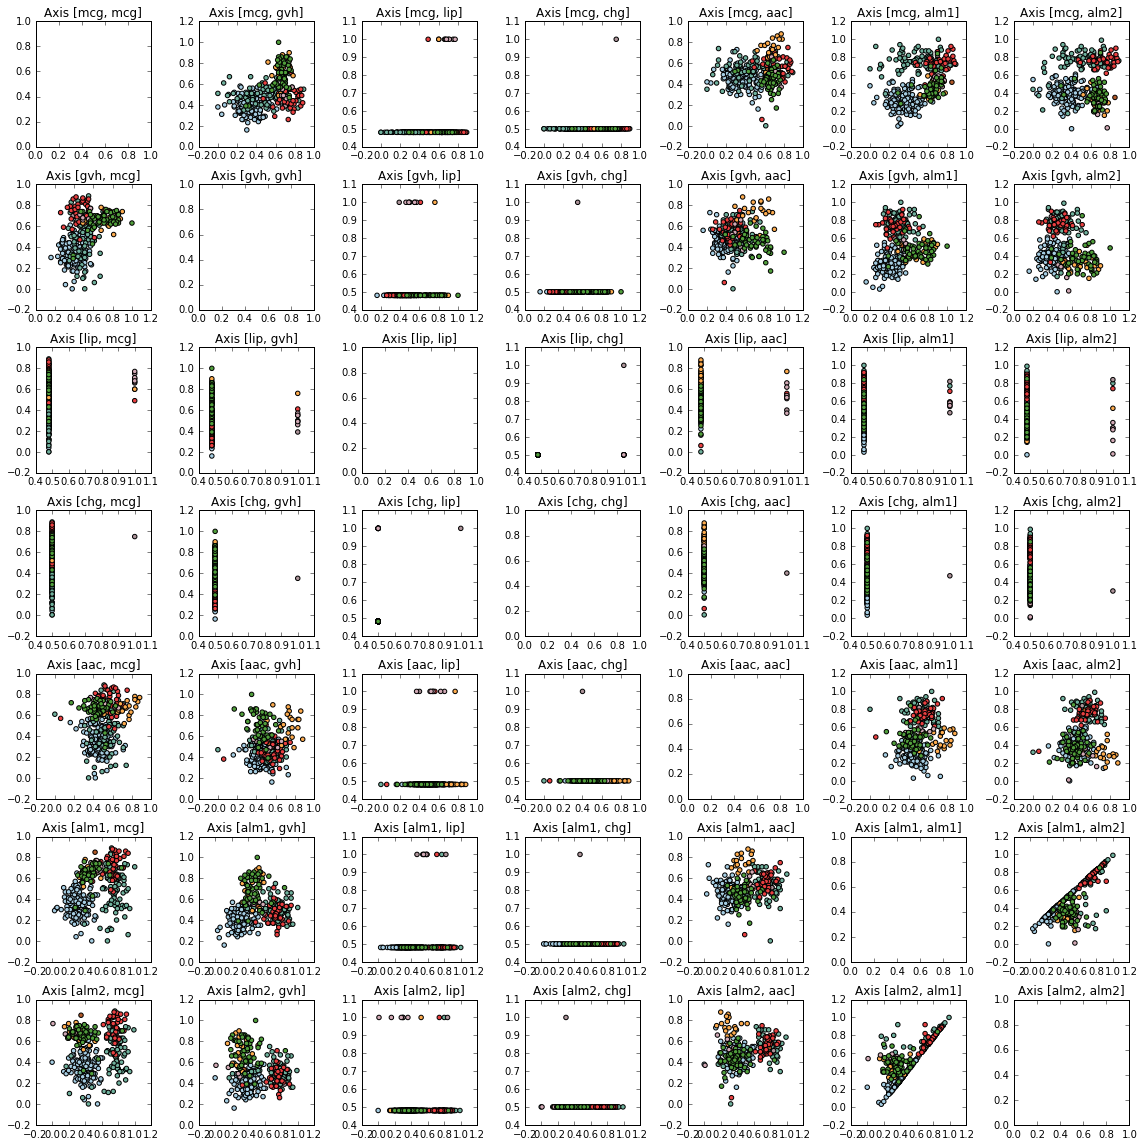

In [209]:
def matrix_plot(values, Y, labels):
    Y = [cat_to_num[elem] for elem in Y]
    f, ax = plt.subplots(len(labels), len(labels), figsize=(16,16))
    for i, j in itertools.product(range(len(labels)), range(len(labels))):
        xlabel = labels[i]
        ylabel = labels[j]
        ax[i][j].set_title("Axis [" + xlabel + ", " + ylabel + "]")
        if i == j: continue
        X = values[:, [i, j]]
        ax[i][j].scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
        
    plt.tight_layout()
    plt.show()

matrix_plot(np.matrix(numerical), categorical, headers)

## Part 3

This part draws the box plots only using the numerical attributes.

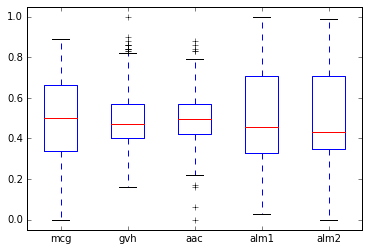

In [207]:
axes = plt.gca()
axes.set_ylim([-.05,1.05])
plt.boxplot(m_numerical, labels=n_headers[1:])
plt.show()